In [90]:
def add_gridlines(ax, label_fontsize=12, x_ticks=None, y_ticks=None, x_labels=None, y_labels=None):
    gl = ax.gridlines(draw_labels=False, crs=ccrs.PlateCarree(), color='k',linestyle='--',linewidth=0.4)
    gl.top_labels = False
    gl.right_labels = False
    gl.left_labels = False
    gl.bottom_labels = False
    
    gl.xlabel_style = {'size': label_fontsize}
    gl.ylabel_style = {'size': label_fontsize}
    gl.xformatter = cticker.LongitudeFormatter()
    gl.yformatter = cticker.LatitudeFormatter()
    # gl.xlocator = plt.MultipleLocator(5)
    # gl.ylocator = plt.MultipleLocator(5)
    ax.set_extent([-128, -123, 32, 39], crs=ccrs.PlateCarree())
    # Set custom x-tick and y-tick locations and labels if provided
    if x_ticks is not None:
        ax.set_xticks(x_ticks, crs=ccrs.PlateCarree())
    if y_ticks is not None:
        ax.set_yticks(y_ticks, crs=ccrs.PlateCarree())
    if x_labels is not None:
        ax.set_xticklabels(x_labels, fontsize=label_fontsize)
    if y_labels is not None:
        ax.set_yticklabels(y_labels, fontsize=label_fontsize)
    # Remove axis labels
#     ax.set_xlabel('')
#     ax.set_ylabel('')
    
    return gl



In [86]:
directory = '/mnt/flow/swot/Matt_Analysis/CNES_L3_CalVal/version_V1_0/swot_aviso/new/'
#############3 pass 13 
nc_swot_13_filt = xr.open_dataset(directory+'FILT2_40_KM_SUBSET_SWOT_UV_PASS_013_OVER_CALVAL_REGION_V1.0.nc')#.sel(time=slice(time_start, time_end))
# nc_swot_13_filt = nc_swot_13_filt.rename({"num_pixels": "temp"})
# nc_swot_13_filt = nc_swot_13_filt.rename({"num_lines": "num_pixels"})
# nc_swot_13_filt = nc_swot_13_filt.rename({"temp": "num_lines"})

# nc_swot_13_filt['ut_g_noiseless'] = np.sqrt(nc_swot_13_filt.ugos_csiro**2+nc_swot_13_filt.vgos_csiro**2)
#########3 pass 26
nc_swot_26_filt = xr.open_dataset(directory+'FILT2_40_KM_SUBSET_SWOT_UV_PASS_026_OVER_CALVAL_REGION_V1.0.nc')#.sel(time=slice(time_start, time_end))

directory = '/mnt/flow/swot/Matt_Analysis/calval_orbit_expert_v1.0/calval_v_2/cube/FILT2_matlab/'

lon_13,lat_13, time_13 = nc_swot_13_filt.longitude,nc_swot_13_filt.latitude,nc_swot_13_filt.timec

ut_13 = nc_swot_13_filt.ut_g_noiseless

lon_26,lat_26, time_26 = nc_swot_26_filt.longitude,nc_swot_26_filt.latitude,nc_swot_26_filt.timec
ut_26 = nc_swot_26_filt.ut_g_noiseless

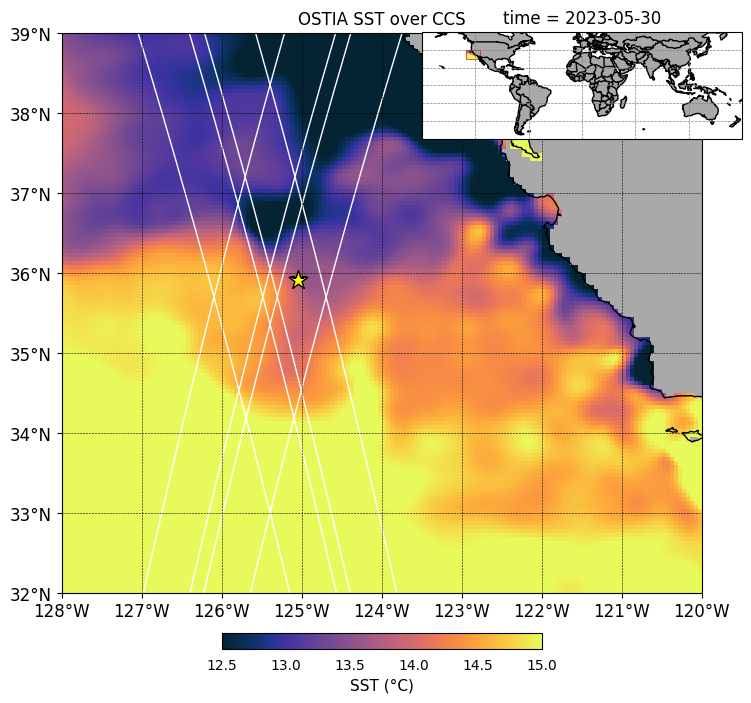

In [137]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
import xarray as xr
import cmocean
import matplotlib.patches as mpatches
import cartopy.mpl.ticker as cticker


# Custom x-tick and y-tick locations and labels
x_ticks = [-128, -127, -126, -125, -124, -123,-122,-121,-120]
y_ticks = [32, 33, 34, 35, 36, 37, 38, 39]
x_labels = ['128°W', '127°W', '126°W', '125°W', '124°W', '123°W', '122°W', '121°W', '120°W']
y_labels = ['32°N', '33°N', '34°N', '35°N', '36°N', '37°N', '38°N', '39°N']

# === Open OSTIA SST ===
nc_sst = xr.open_dataset('METOFFICE-GLO-SST-L4-NRT-OBS-SST-V2_1743420265017.nc')

lon = nc_sst.longitude.values
lat = nc_sst.latitude.values
sst = nc_sst.analysed_sst[1]- 273.15
label_fontsize1 = 12

lon_moor = -125.044
lat_moor = 35.917

ccs_extent = [-130, -115, 30, 40]

proj = ccrs.PlateCarree()

# === Create figure ===
fig = plt.figure(figsize=(8, 8))

# === Main plot ===
ax = fig.add_axes([0.1, 0.1, 0.8, 0.8], projection=proj)
sst_plot = sst.plot.pcolormesh(ax=ax, transform=proj, cmap=cmocean.cm.thermal, 
                               add_colorbar=False, vmin=12.5, vmax=15)

ax.scatter(lon_moor, lat_moor, color='yellow', edgecolor='black',
           s=200, marker='*', transform=ccrs.PlateCarree(), zorder=5)
# ax.text(lon_moor + 0.2, lat_moor + 0.1, 'S2 mooring', color='yellow',
#         fontsize=10, transform=ccrs.PlateCarree())
ax.plot(lon_13[:, 3], lat_13[:, 3], color='w', linewidth=1, transform=ccrs.PlateCarree())
ax.plot(lon_13[:, 30], lat_13[:, 30], color='w', linewidth=1, transform=ccrs.PlateCarree())
ax.plot(lon_13[:, 38], lat_13[:, 38], color='w', linewidth=1, transform=ccrs.PlateCarree())
ax.plot(lon_13[:, 65], lat_13[:, 65], color='w', linewidth=1, transform=ccrs.PlateCarree())

ax.plot(lon_26[:, 3], lat_26[:, 3], color='w', linewidth=1, transform=ccrs.PlateCarree())
ax.plot(lon_26[:, 30], lat_26[:, 30], color='w', linewidth=1, transform=ccrs.PlateCarree())
ax.plot(lon_26[:, 38], lat_26[:, 38], color='w', linewidth=1, transform=ccrs.PlateCarree())
ax.plot(lon_26[:, 65], lat_26[:, 65], color='w', linewidth=1, transform=ccrs.PlateCarree())

ax.set_extent(ccs_extent, crs=proj)
ax.coastlines()
ax.add_feature(cfeature.BORDERS)
ax.set_title('OSTIA SST over CCS')
ax.add_feature(cfeature.LAND, facecolor='darkgrey')
ax.add_feature(cfeature.BORDERS, edgecolor='black')
ax.set_xlabel('')
ax.set_ylabel('')
# Add gridlines & labels
add_gridlines(ax, label_fontsize=label_fontsize1, x_ticks=x_ticks, y_ticks=y_ticks, x_labels=x_labels, y_labels=y_labels)
# gl = ax.gridlines(draw_labels=True, linewidth=0.5, color='gray', linestyle='--')
# gl.top_labels = False
# gl.right_labels = False
# gl.xlabel_style = {'size': 10}
# gl.ylabel_style = {'size': 10}
# gl.xformatter = cticker.LongitudeFormatter()
# gl.yformatter = cticker.LatitudeFormatter()
# gl.xlocator = plt.MultipleLocator(5)
# gl.ylocator = plt.MultipleLocator(5)

# # Colorbar
# cbar = plt.colorbar(sst_plot, ax=ax, orientation='horizontal', pad=0.05)
# cbar.set_label('SST (°C)')


cbar_ax = fig.add_axes([0.3, 0.08, 0.4, 0.02])  # [left, bottom, width, height]
cbar = fig.colorbar(sst_plot, cax=cbar_ax, orientation='horizontal')
cbar.set_label('SST (°C)', fontsize=11)
cbar.ax.tick_params(labelsize=10, length=3, width=0.02)

# === Inset map ===
axins = fig.add_axes([0.55, 0.66, 0.4, 0.25], projection=proj)
axins.add_feature(cfeature.LAND, facecolor='darkgrey')
axins.add_feature(cfeature.BORDERS, edgecolor='black')
gl = axins.gridlines(draw_labels=False, linewidth=0.5, color='gray', linestyle='--')
gl.top_labels = False
gl.right_labels = False

sst.plot.pcolormesh(ax=axins, transform=proj, cmap=cmocean.cm.thermal, 
                    add_colorbar=False, vmin=12.5, vmax=15)
axins.coastlines()
# axins.set_extent([-180, -20, -60, 60], crs=proj)
axins.set_extent([-180, 180, -60, 60], crs=proj)

axins.grid()

# Add rectangle for CCS extent
rect = mpatches.Rectangle((ccs_extent[0], ccs_extent[2]),
                          ccs_extent[1]-ccs_extent[0],
                          ccs_extent[3]-ccs_extent[2],
                          linewidth=0.5, edgecolor='red', facecolor='none',
                          transform=proj)
axins.add_patch(rect)

plt.show()


In [22]:
mv SWOT_L3_LR_SSH_Expert_459_001_20230314T002238_20230314T011343_v0.1.nc /mnt/flow/swot/Matt_Analysis/CNES_L3_CalVal/version_V1_0/swot_aviso/new/sst